In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [94]:
# читаем исходные данные
iris = load_iris()
#iris

In [95]:
# смотрим, что есть
#print(iris.DESCR)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [96]:
# заливаем данные в DataFrame
iris_all = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_class = iris.target
# выбираем пару исследуемых параметров
i_p1 = 0
i_p2 = 1
p1 = iris.feature_names[i_p1]
p2 = iris.feature_names[i_p2]

iris_x = iris_all[[p1, p2]]
#iris_x = iris_all[['sepal length (cm)','sepal width (cm)']]

In [97]:
# разделяем выборку на тренировочную и проверочную
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_x, iris_class, test_size=0.25)

In [98]:
# импорт LDA-функционала
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [99]:
# инициализируем объект LDA-функционала
lda = LinearDiscriminantAnalysis()

In [100]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [101]:
# результат предсказания
lda.predict(X_test)

array([0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0])

In [102]:
# проверка vs предсказания
result = pd.DataFrame([y_test, lda.predict(X_test)])
result

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,1,2,1,0,0,2,0,...,1,2,2,0,2,1,0,2,0,0
1,0,0,0,1,2,1,0,0,2,0,...,1,1,1,1,2,2,0,1,0,0


In [103]:
# оценка точности модели
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

In [104]:
# коэффициенты плоскостей, центры группирования

In [105]:
lda.coef_

array([[-5.48592174,  8.22673562],
       [ 1.34792566, -3.72696586],
       [ 3.72419647, -4.04979279]])

In [106]:
lda.intercept_

array([  1.98401267,   1.80767582, -12.11955814])

In [107]:
lda.means_

array([[5.05833333, 3.47777778],
       [5.96944444, 2.79722222],
       [6.625     , 2.9725    ]])

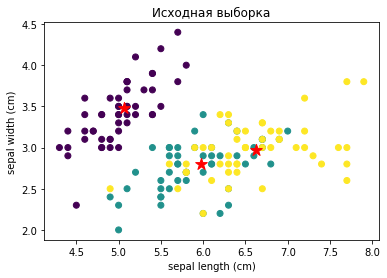

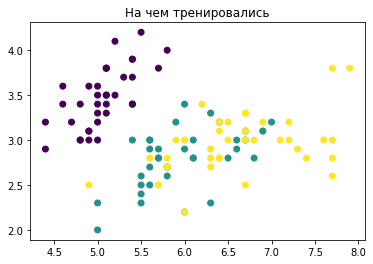

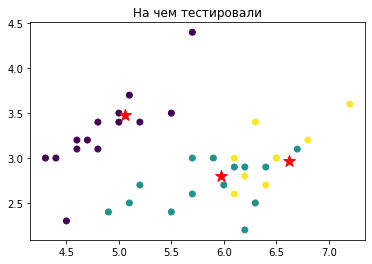

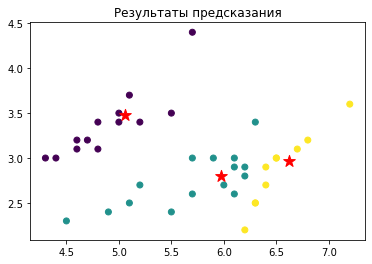

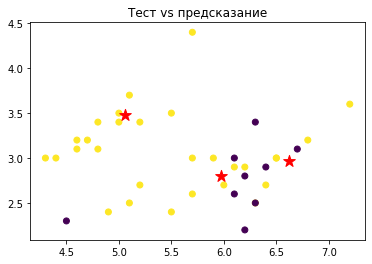

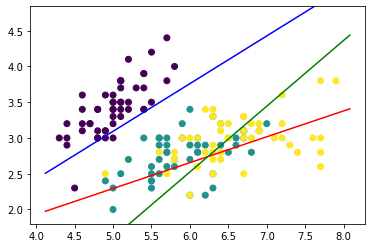

In [108]:
# Раскраска результатов
# вся выборка
plt.scatter(x = iris_x[p1], y = iris_x[p2], c = iris_class)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('Исходная выборка')
plt.xlabel(p1)
plt.ylabel(p2)
plt.show()
# на чем тренировались
plt.scatter(x = X_train[p1], y = X_train[p2], c = y_train)
plt.title('На чем тренировались')
plt.show()
# на чем тестировались
plt.scatter(x = X_test[p1], y = X_test[p2], c = y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('На чем тестировали')
plt.show()
# что предсказали
plt.scatter(x = X_test[p1], y = X_test[p2], c = lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('Результаты предсказания')
plt.show()
# разница между тестом и предсказанием
plt.scatter(x = X_test[p1], y = X_test[p2], c = y_test == lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('Тест vs предсказание')
plt.show()
# рисуем следы от плоскостей
plt.ylim(0.9 * iris_x[p2].min(), 1.1 * iris_x[p2].max())
plt.scatter(x = iris_x[p1], y = iris_x[p2], c = iris_class)
x_min, x_max = plt.xlim()
#plt.plot(x_min, -(x_min * lda.coef_[0][0] + lda.intercept_[0]) / lda.coef_[0][1], marker = 'o', color = 'r')
#plt.plot(x_max, -(x_max * lda.coef_[0][0] + lda.intercept_[0]) / lda.coef_[0][1], marker = 'o', color = 'r')

xx = np.linspace(x_min, x_max)
for coef, intercept, color in zip(lda.coef_, lda.intercept_, ['b', 'r', 'g']):
    plt.plot(xx, -(xx * coef[0] + intercept) / coef[1], c=color)

In [109]:
# один кластер отделяется очень хорошо, а два других довольно здорово смешаны друг с другом

In [110]:
# попробуем определить количество кластеров
from sklearn.cluster import KMeans

In [111]:
# поиграем с количеством кластеров
kmeans2 = KMeans(n_clusters=2)
clusters2 = kmeans2.fit_predict(iris_x)
#clusters2
kmeans3 = KMeans(n_clusters=3)
clusters3 = kmeans3.fit_predict(iris_x)
kmeans4 = KMeans(n_clusters=4)
clusters4 = kmeans4.fit_predict(iris_x)
kmeans5 = KMeans(n_clusters=5)
clusters5 = kmeans5.fit_predict(iris_x)

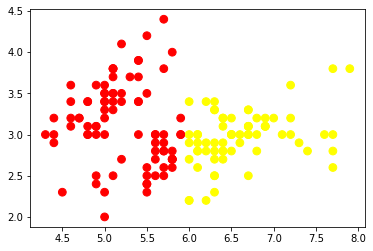

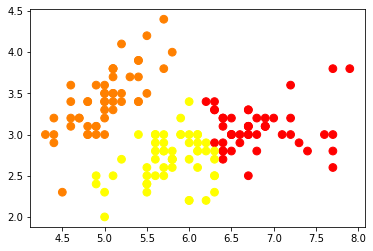

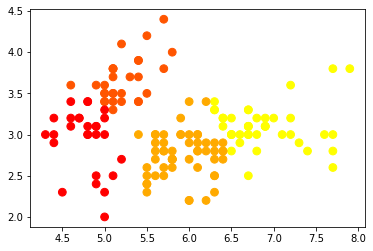

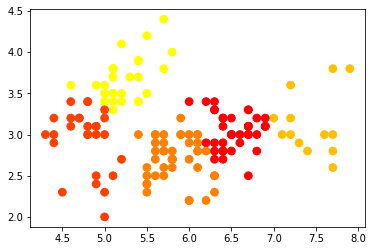

In [112]:
# и посмотрим, как это выглядит
plt.scatter(iris_x[p1], iris_x[p2], cmap='autumn', c=clusters2, s=60)
plt.show()
plt.scatter(iris_x[p1], iris_x[p2], cmap='autumn', c=clusters3, s=60)
plt.show()
plt.scatter(iris_x[p1], iris_x[p2], cmap='autumn', c=clusters4, s=60)
plt.show()
plt.scatter(iris_x[p1], iris_x[p2], cmap='autumn', c=clusters5, s=60)

In [113]:
k_inert = []
n_clust = range(1, 21)
for i in n_clust:
    clf_kmeans = KMeans(n_clusters = i)
    clusters_kmeans = clf_kmeans.fit_predict(iris_x)
    # добавляем инерцию каждой модели в список
    k_inert.append(clf_kmeans.inertia_)

C:\Users\ruasna5\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


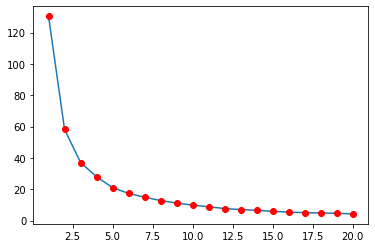

In [114]:
plt.plot(n_clust, k_inert)
plt.plot(n_clust, k_inert ,'ro')

In [115]:
# априори известно, что кластеров 3, что соответствует графику, но и м.б. 4 не помешало бы проверить
# если брать не первые два признака, а первый и третий, то получим 2-3 кластера, ну и т.д. можно играть 
# сочетаниями признаков, и результат будет в районе 3-х кластеров

In [116]:
# просто посмотрим дендрограмму
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

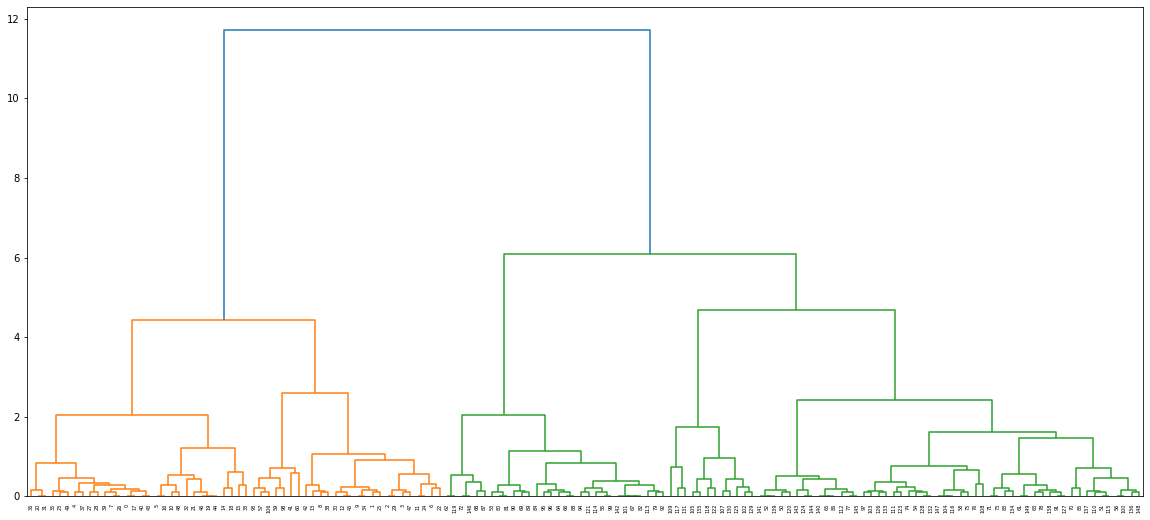

In [117]:
distance_mat = pdist(iris_x) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)